<a href="https://colab.research.google.com/github/Adeeba-Yusuf/Tesla-Stock-Price-Prediction-using-Time-Series-/blob/main/Tesla_stock_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
data=pd.read_csv("/content/tesla_stock_price_14_years.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
#univarite timeseries
stock_data=data[["Date","Close"]]

In [ ]:
stock_data.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [ ]:
## Checking for null values
stock_data.isnull().sum()

,0
Date,0
Close,0


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3432 non-null   object 
 1   Close   3432 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.8+ KB


In [ ]:
## Converting date column to date time format
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

/tmp/ipython-input-4092653866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data["Date"])


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3432 non-null   datetime64[ns]
 1   Close   3432 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


In [ ]:
stock_data.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [ ]:
## Set Date as index so it behaves like a time series index
stock_data=stock_data.set_index("Date")

In [ ]:
stock_data

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2024-02-09,193.570007
2024-02-12,188.130005
2024-02-13,184.020004


In [ ]:
stock_data.head()

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


# Exploratory Data Analysis


In [ ]:
stock_data.describe()

,Close
count,3432.000000
mean,71.742430
std,101.869406
min,1.053333
25%,10.966167
50%,17.019667
75%,126.882500
max,409.970001


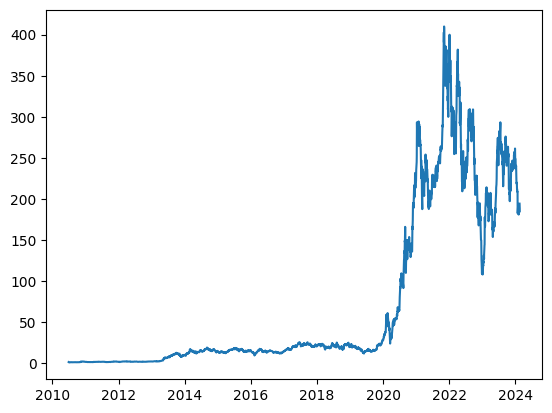

In [ ]:
plt.plot(stock_data.Close)

(array([2435.,   86.,   47.,   90.,  149.,  279.,  184.,   86.,   60.,
          16.]),
 array([  1.05333304,  41.94499986,  82.83666668, 123.7283335 ,
        164.62000031, 205.51166713, 246.40333395, 287.29500077,
        328.18666759, 369.0783344 , 409.97000122]),
 <BarContainer object of 10 artists>)

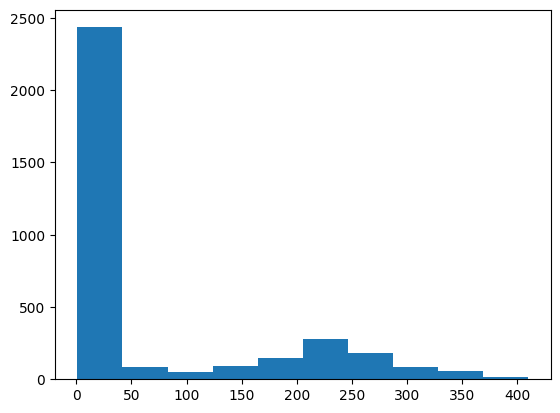

In [ ]:
plt.hist(stock_data.Close)

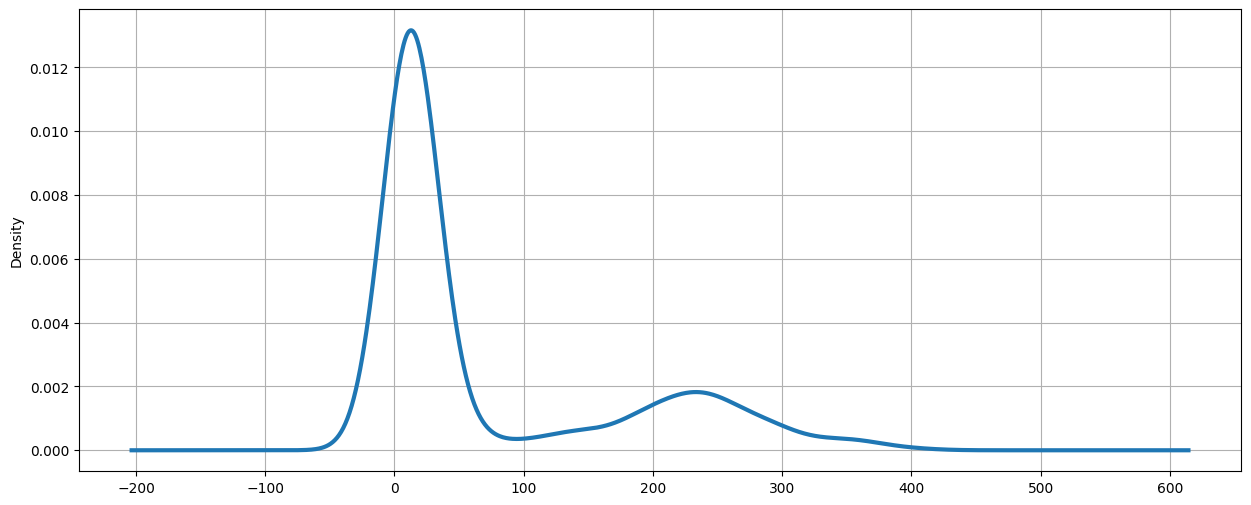

In [ ]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (15,6), linewidth= 3)
plt.xticks(fontsize = 10)
plt.grid("both")
plt.ylabel('Density', fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [ ]:
## 48-day moving average indicator
rolmean = stock_data["Close"].rolling(48).mean()

In [ ]:
rolstd = stock_data["Close"].rolling(48).std()

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

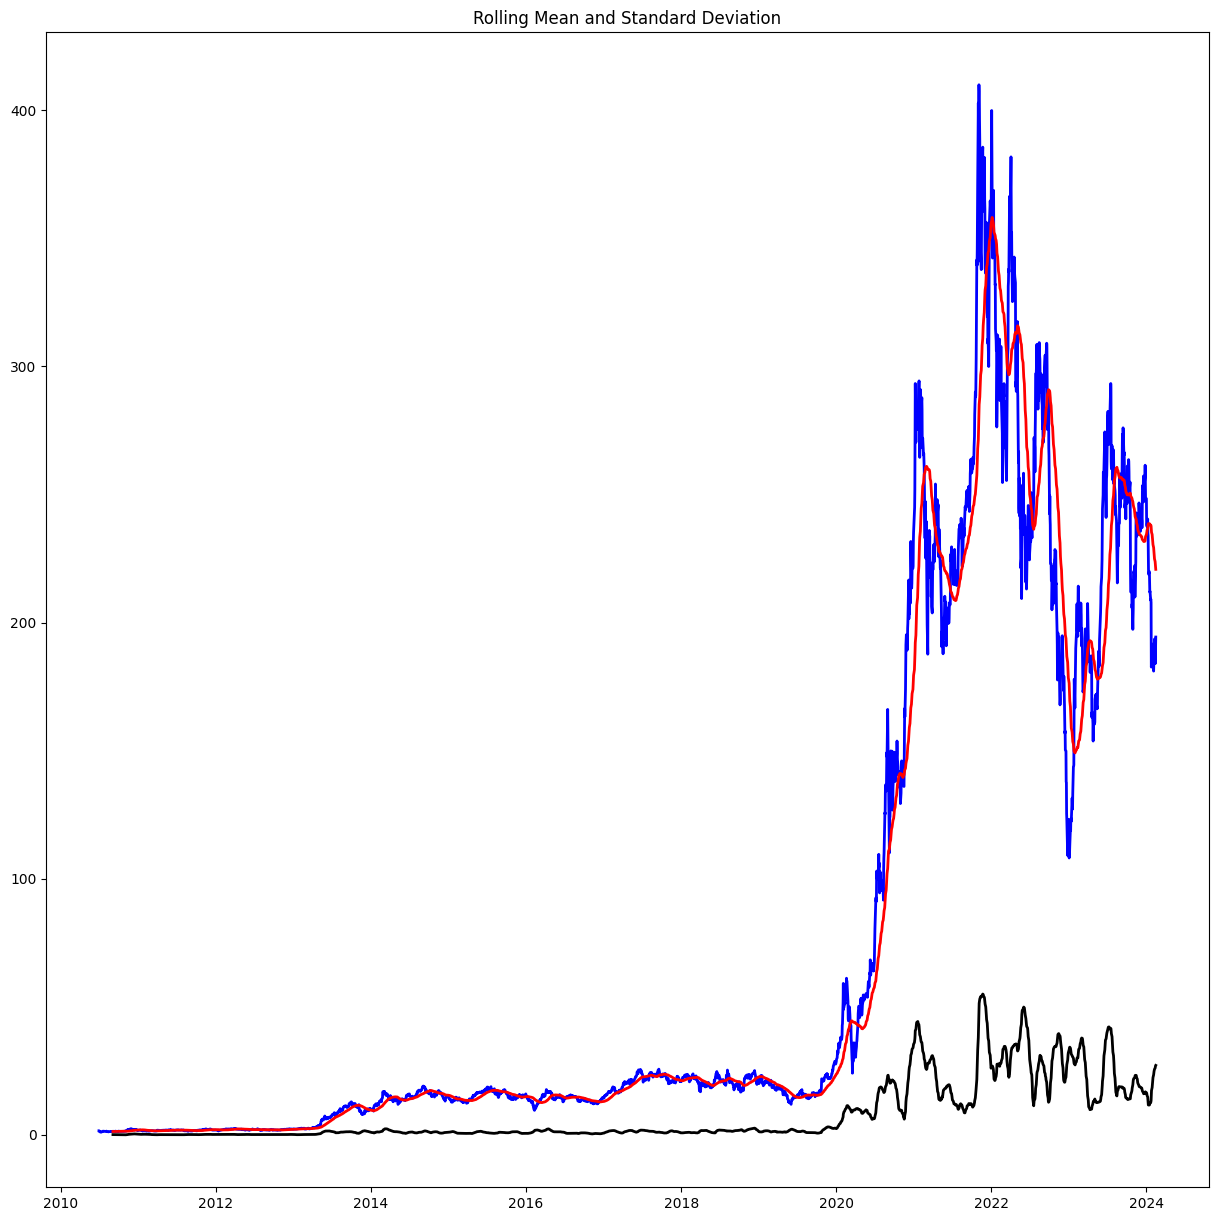

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(stock_data.Close, color='blue', label='Original', linewidth = 2)
plt.plot(rolmean, color='red', label='Rolling Mean', linewidth = 2)
plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 2)
plt.title('Rolling Mean and Standard Deviation', fontsize = 12)

<Axes: ylabel='Close'>

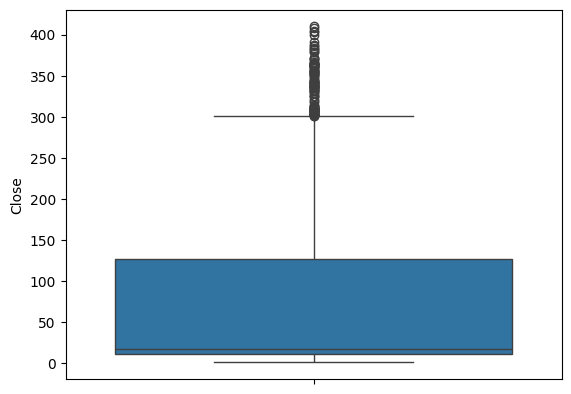

In [ ]:
sns.boxplot(stock_data.Close)

# Stationary Check

In [ ]:
#ADF(ada fullar test)
adft = adfuller(stock_data["Close"], autolag='AIC')

In [ ]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

,0
test stats,-1.194581
p-value,0.675923
lag,29.000000
data points,3402.000000


# Seasonal Decomposition

In [ ]:
result = seasonal_decompose(stock_data[["Close"]], period=30)

In [ ]:
result.seasonal

,seasonal
Date,
2010-06-29,-0.994061
2010-06-30,-0.312608
2010-07-01,-0.775986
2010-07-02,-1.211864
2010-07-06,-0.968689
...,...
2024-02-09,-0.787519
2024-02-12,-0.169488
2024-02-13,0.114170


<Figure size 2000x1000 with 0 Axes>

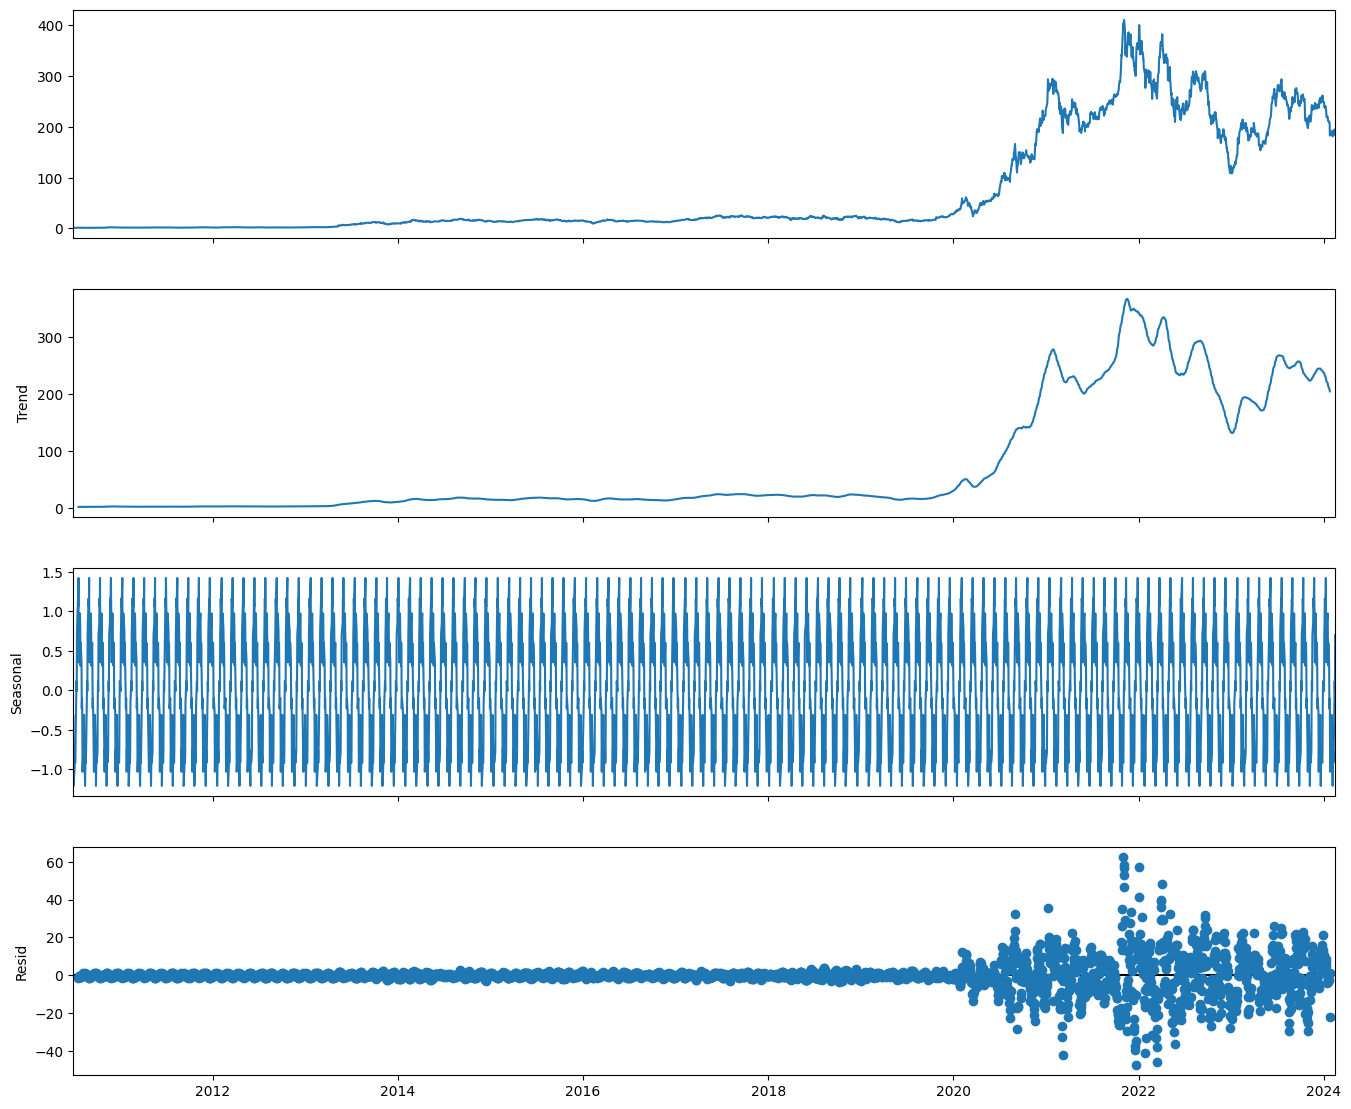

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(15,12)

In [ ]:
result = seasonal_decompose(stock_data[["Close"]],period=30,model="additive")

<Figure size 2000x1000 with 0 Axes>

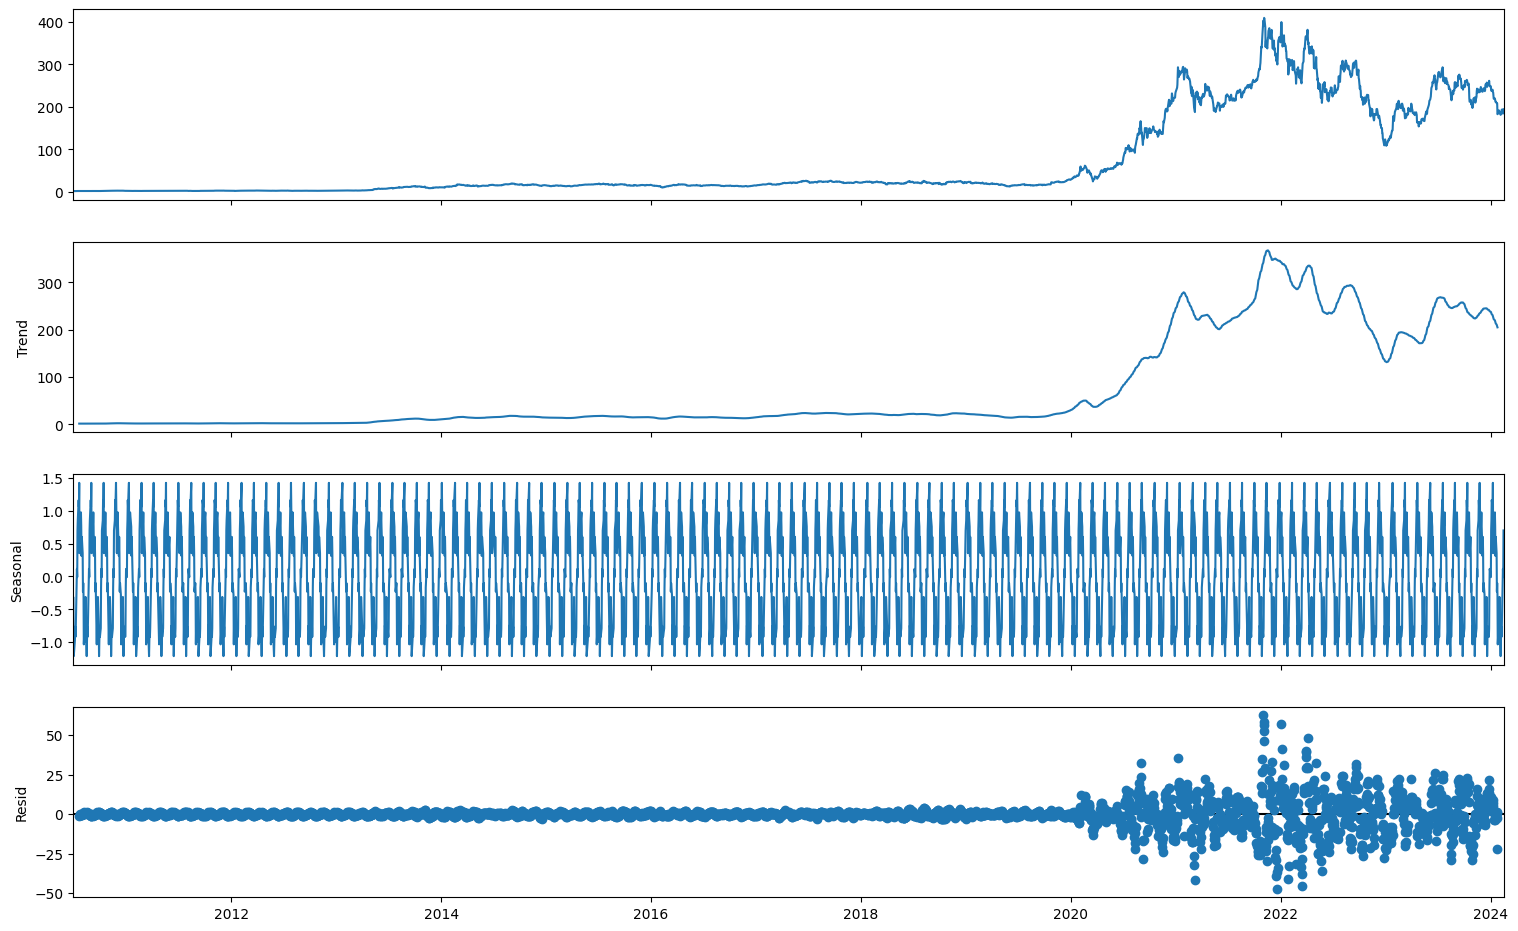

In [ ]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

# Autocorrelation

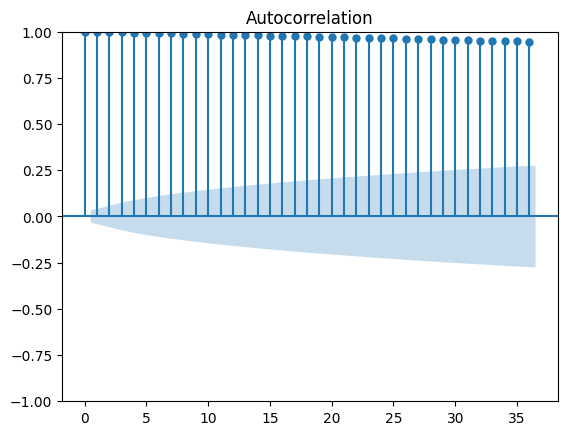

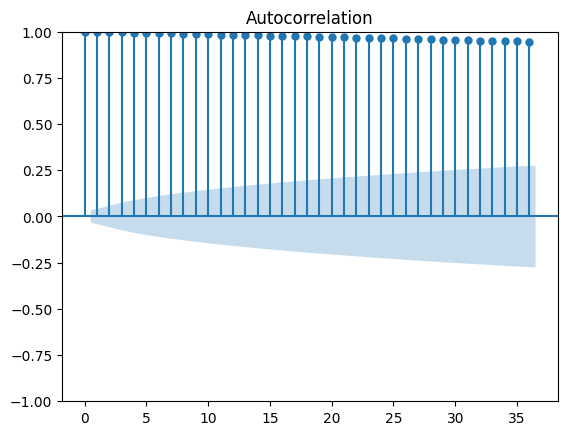

In [ ]:
plot_acf(stock_data.Close)

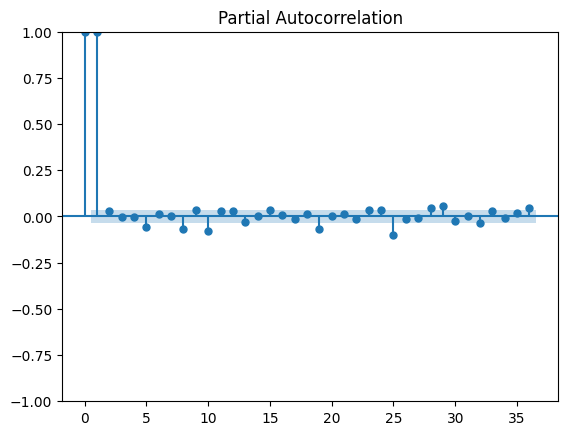

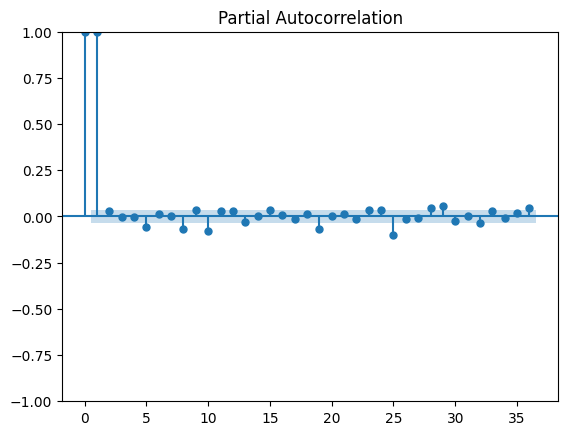

In [ ]:
plot_pacf(stock_data.Close)

# Data Preprocessing

In [ ]:
df_close = stock_data["Close"]

In [ ]:
## Making data stationary
df_close=df_close.diff(2).dropna()

In [ ]:
df_close

,Close
Date,
2010-07-01,-0.128667
2010-07-02,-0.308667
2010-07-06,-0.390000
2010-07-07,-0.226667
2010-07-08,0.090000
...,...
2024-02-09,5.990005
2024-02-12,-1.429993
2024-02-13,-9.550003


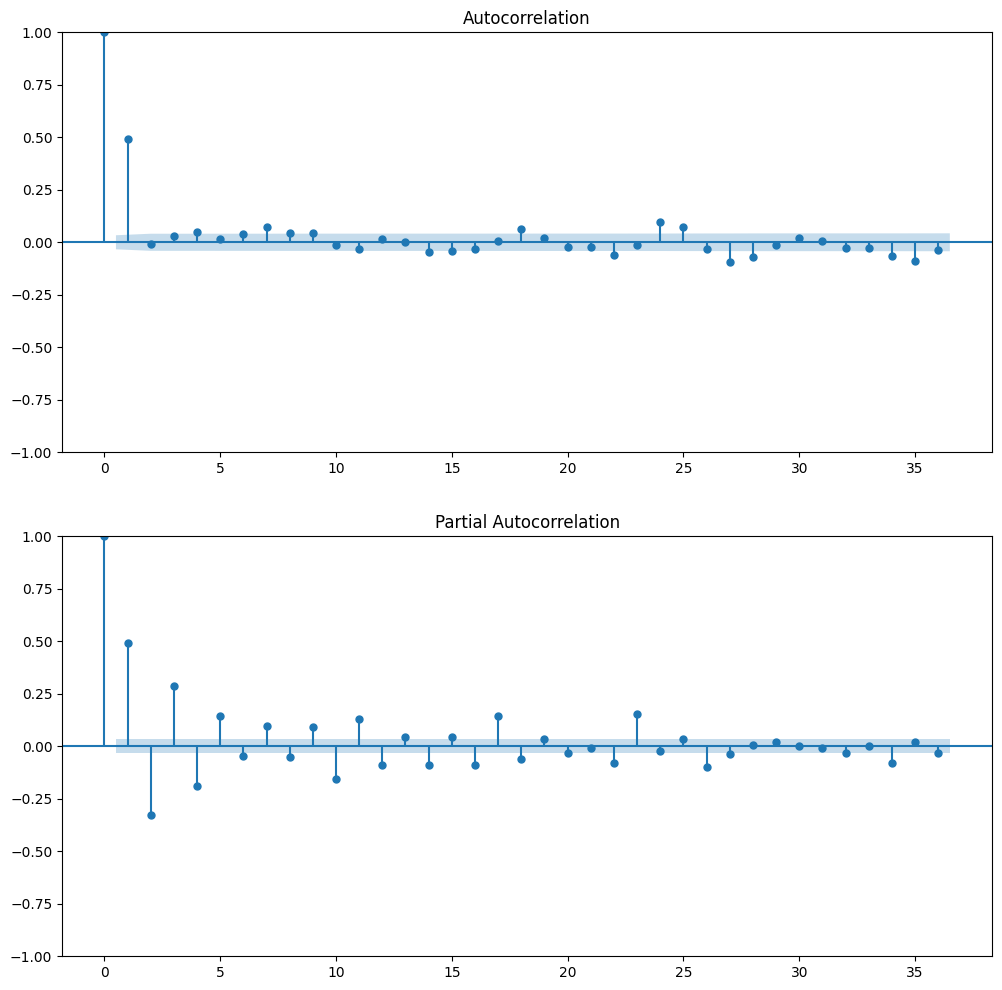

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_close, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_close, ax=ax2)

In [ ]:
## split data into train and test set

train_data = df_close[0:-60]
test_data = df_close[-60:]

# Model Building

In [ ]:
history = [x for x in train_data]

In [ ]:
model = ARIMA(history,order=(1,1,1))

In [ ]:
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3370
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10616.592
Date:                Sun, 17 Aug 2025   AIC                          21239.184
Time:                        13:53:53   BIC                          21257.552
Sample:                             0   HQIC                         21245.752
                               - 3370                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4937      0.006     80.753      0.000       0.482       0.506
ma.L1         -0.9997      0.001   -849.128      0.000      -1.002      -0.997
sigma2        31.9063      0.261    122.287      0.000      31.395      32.418
===================================================================================
Ljung-Box (L1) (Q):                  86.68   Jarque-Bera (JB):             39310.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             952.87   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast()[0]

np.float64(-4.143785057309917)

In [ ]:
test_data[0]

/tmp/ipython-input-2395562395.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data[0]


np.float64(2.010009765624943)

In [ ]:
mean_squared_error([test_data[0]],model.forecast())

/tmp/ipython-input-3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


37.86919072277989

In [ ]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

/tmp/ipython-input-2013795996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


np.float64(6.15379482293486)

In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if  rmse < best_score:
                         best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
history=[x for x in train_data]
predictions = list()
conf_list = list()
for i in range(len(test_data)):
    model = ARIMA(history,order=(1,0,2))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[i])
print(f"RMSE is {np.sqrt(mean_squared_error(test_data,predictions))}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/tmp/ipython-input-2835186615.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test_data[i])


RMSE is 5.713258696741439


In [ ]:
test_data

,Close
Date,
2023-11-20,2.010010
2023-11-21,6.899994
2023-11-22,-1.389999
2023-11-24,-5.750000
2023-11-27,1.869995
2023-11-28,11.270004
2023-11-29,8.059998
2023-11-30,-6.639999
2023-12-01,-5.309998


In [ ]:
predictions

[array([0.739375]),
 array([1.54184014]),
 array([5.66299002]),
 array([-6.77323918]),
 array([1.22688916]),
 array([0.85250161]),
 array([10.69482602]),
 array([-2.30130767]),
 array([-4.07877042]),
 array([-1.0309873]),
 array([-3.30952214]),
 array([3.3477775]),
 array([0.61705496]),
 array([3.49678163]),
 array([1.19855893]),
 array([-3.90035337]),
 array([-2.79053035]),
 array([2.46941693]),
 array([11.79179556]),
 array([2.74321544]),
 array([-1.39829191]),
 array([5.43265733]),
 array([-10.09925973]),
 array([7.59395397]),
 array([-1.94131294]),
 array([4.30059358]),
 array([4.89689639]),
 array([-8.06276129]),
 array([-4.74079783]),
 array([0.09853365]),
 array([-10.06766189]),
 array([-0.43518615]),
 array([-0.52778947]),
 array([3.07770867]),
 array([-5.55191905]),
 array([-0.93804755]),
 array([-6.84791865]),
 array([-8.35093843]),
 array([0.86352854]),
 array([-4.36493391]),
 array([-3.86167478]),
 array([0.3136023]),
 array([-3.56864781]),
 array([0.34511333]),
 array([-1.

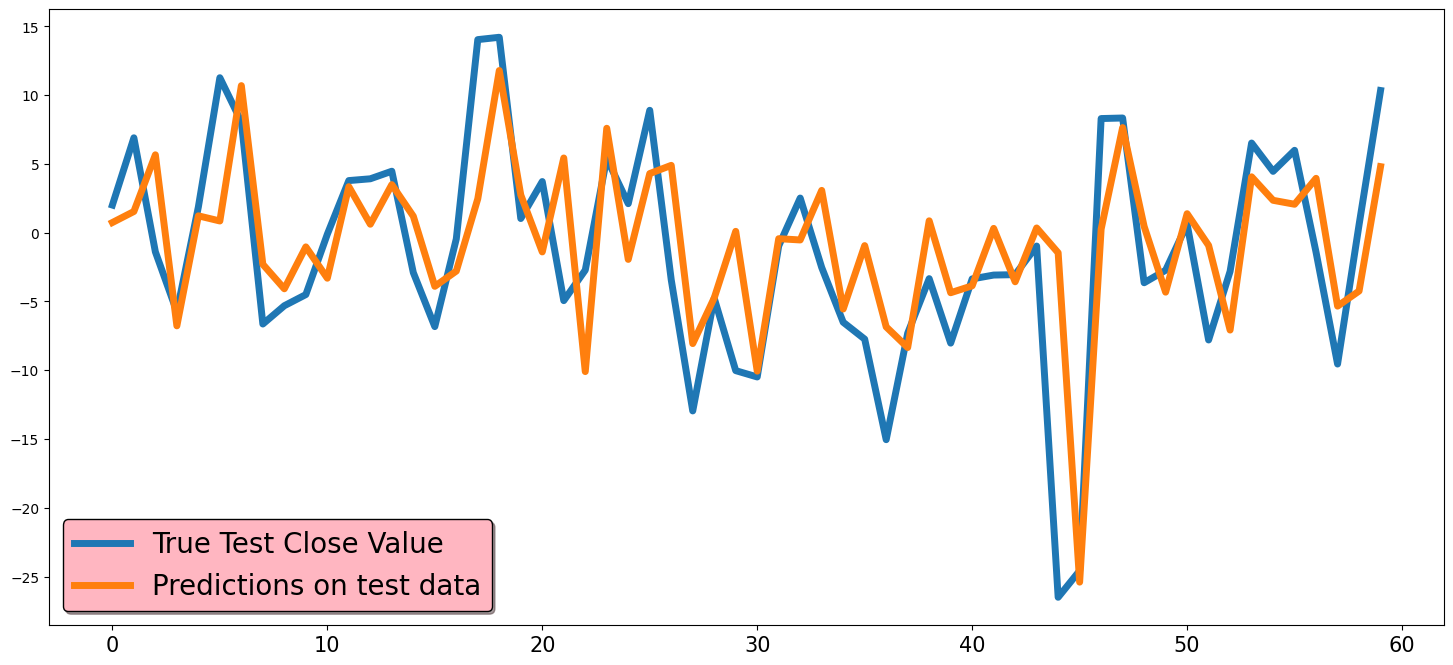

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
fc_series = pd.Series(predictions, index=test_data.index)

In [ ]:
fc_series

,0
Date,
2023-11-20,[0.739374995324673]
2023-11-21,[1.5418401444821668]
2023-11-22,[5.662990015166687]
2023-11-24,[-6.773239184371364]
2023-11-27,[1.2268891635239723]
2023-11-28,[0.8525016065033117]
2023-11-29,[10.694826015624276]
2023-11-30,[-2.3013076667084404]
2023-12-01,[-4.078770420390756]


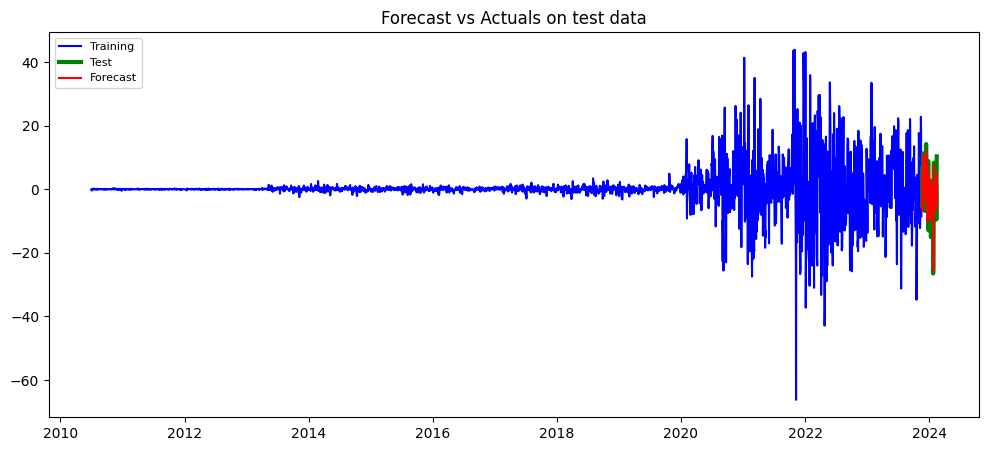

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

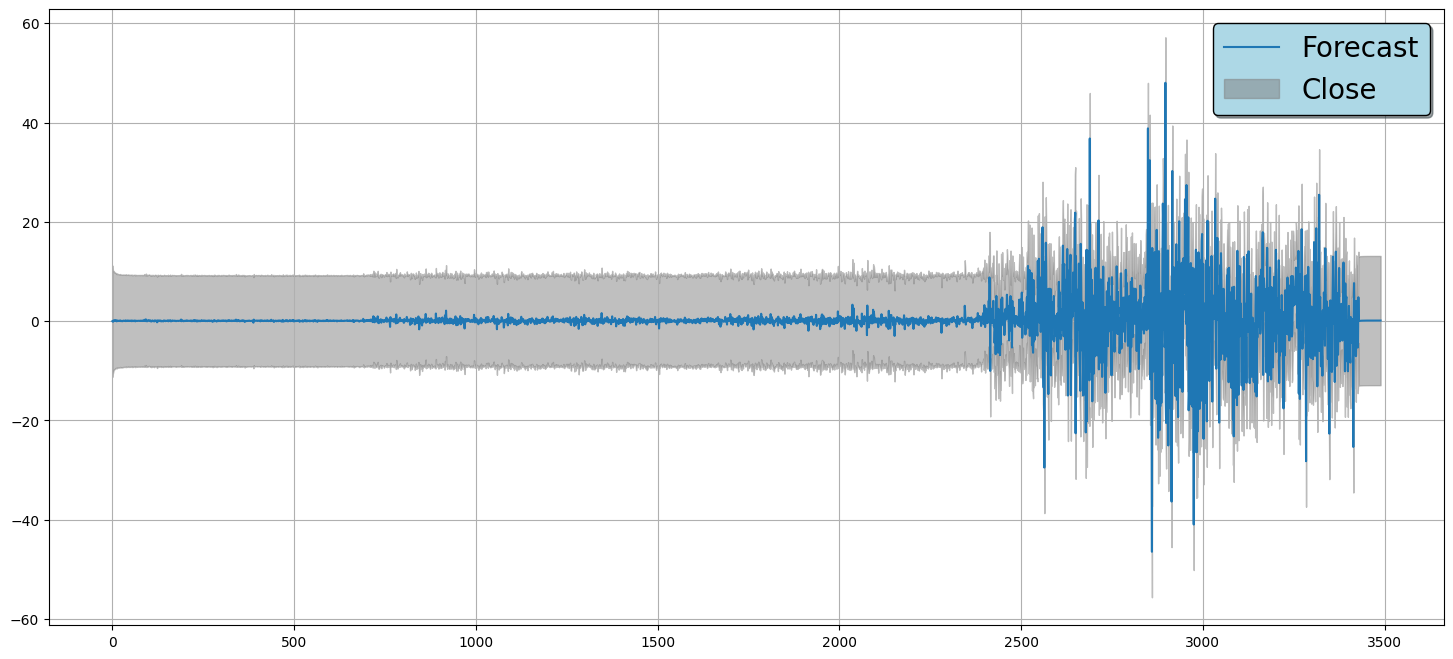

In [ ]:

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [ ]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 8.518992570603666


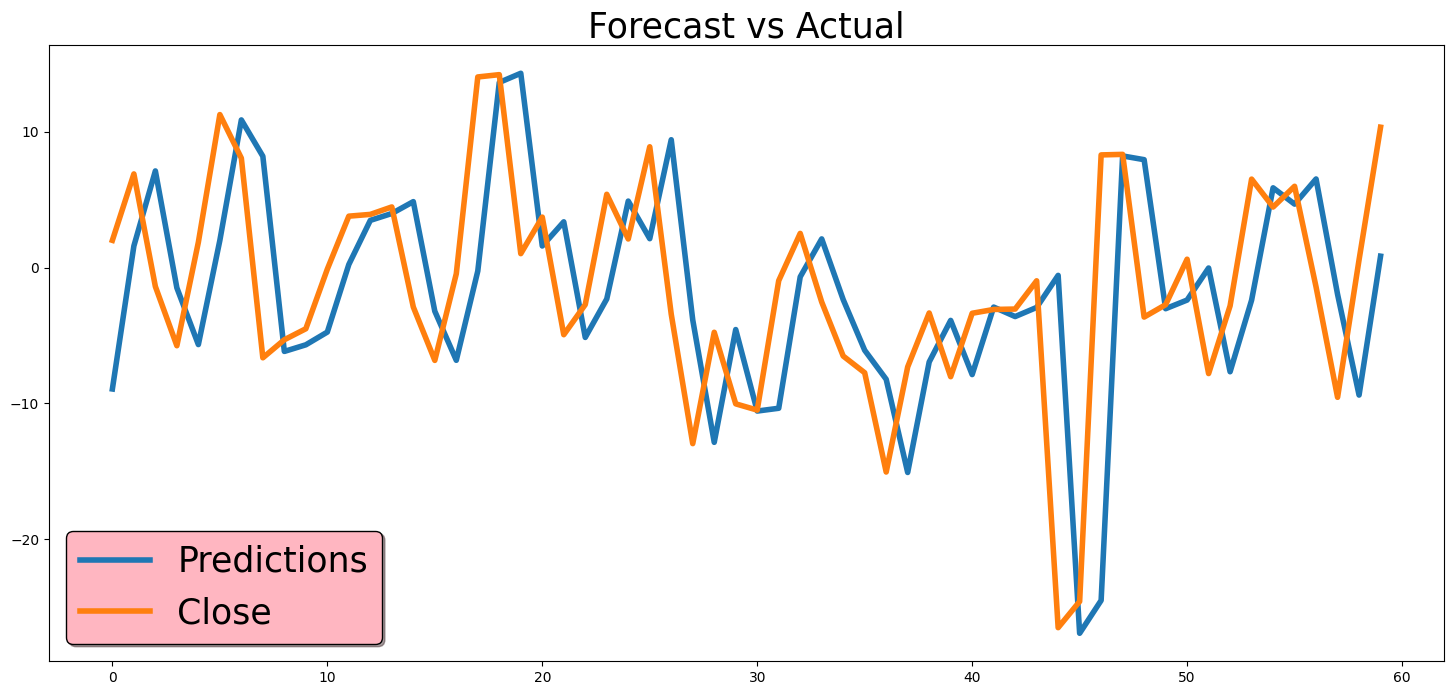

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')